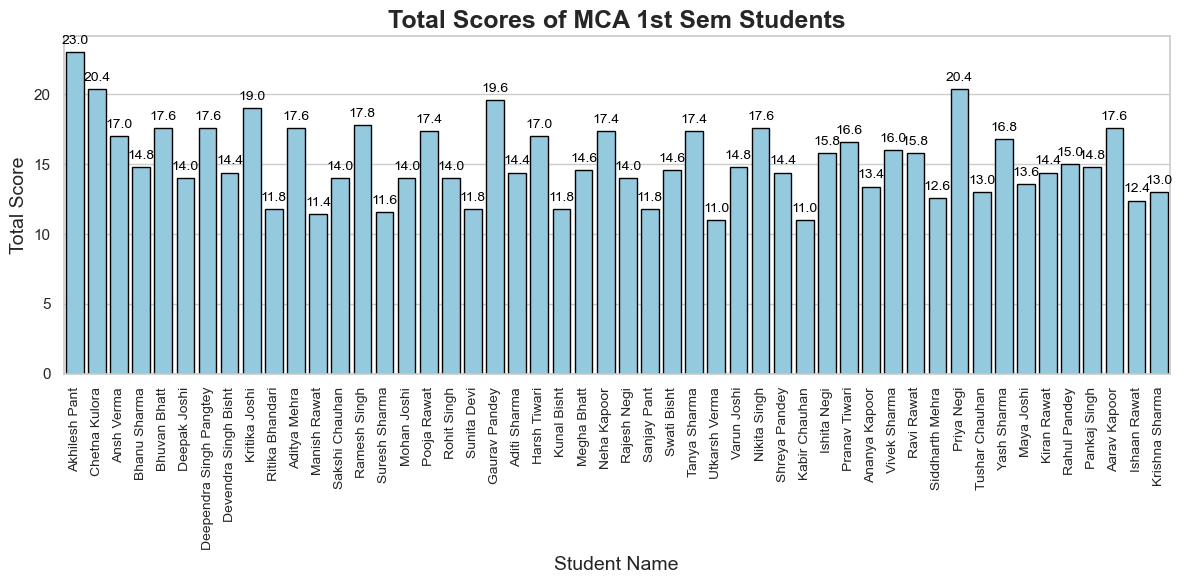

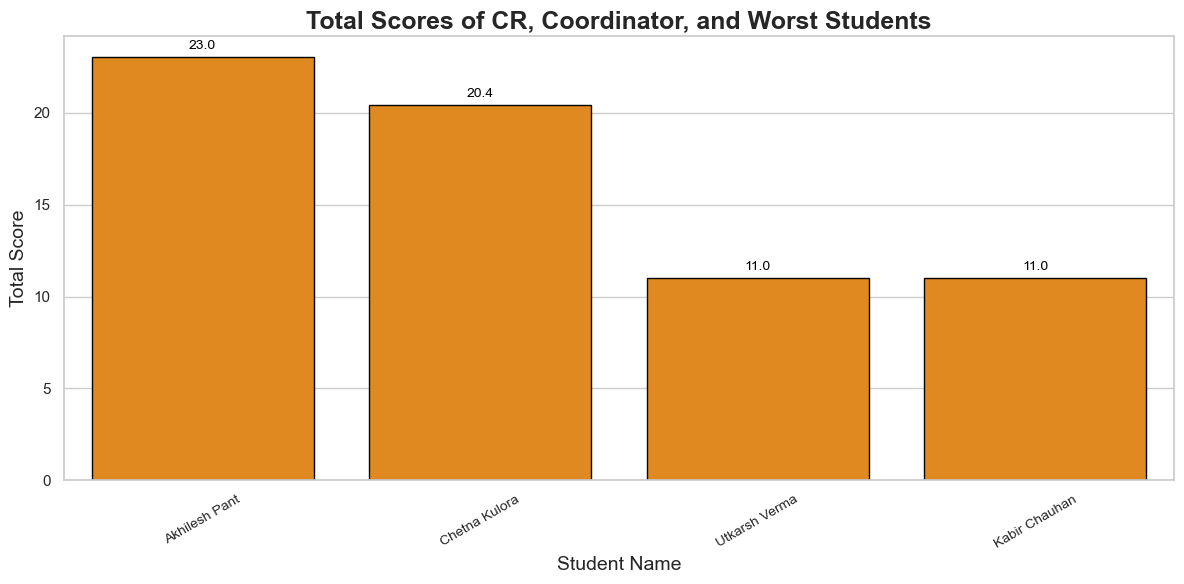


Detailed Data for CR, Coordinator and Worst Students:
             Name  GetUpTime  StudyHours  FitnessHours  CommunicationSkills  \
0   Akhilesh Pant          6           7           1.5                    9   
1   Chetna Kulora          6           6           1.2                    8   
29  Utkarsh Verma          9           3           1.0                    5   
33  Kabir Chauhan          9           3           1.0                    5   

    TotalScore         Role  
0         23.0           CR  
1         20.4  Coordinator  
29        11.0      Student  
33        11.0      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- CommunicationSkillsPractice: 8


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Akhilesh Pant", "Chetna Kulora", "Ansh Verma", "Bhanu Sharma", "Bhuvan Bhatt",
        "Deepak Joshi", "Deependra Singh Pangtey", "Devendra Singh Bisht", "Kritika Joshi",
        "Ritika Bhandari", "Aditya Mehra", "Manish Rawat", "Sakshi Chauhan", "Ramesh Singh",
        "Suresh Sharma", "Mohan Joshi", "Pooja Rawat", "Rohit Singh", "Sunita Devi",
        "Gaurav Pandey", "Aditi Sharma", "Harsh Tiwari", "Kunal Bisht", "Megha Bhatt",
        "Neha Kapoor", "Rajesh Negi", "Sanjay Pant", "Swati Bisht", "Tanya Sharma",
        "Utkarsh Verma", "Varun Joshi", "Nikita Singh", "Shreya Pandey", "Kabir Chauhan",
        "Ishita Negi", "Pranav Tiwari", "Ananya Kapoor", "Vivek Sharma", "Ravi Rawat",
        "Siddharth Mehra", "Priya Negi", "Tushar Chauhan", "Yash Sharma", "Maya Joshi",
        "Kiran Rawat", "Rahul Pandey", "Pankaj Singh", "Aarav Kapoor", "Ishaan Rawat",
        "Krishna Sharma"
    ],
    'GetUpTime': [6, 6, 7, 8, 7, 8, 7, 8, 7, 9, 7, 9, 8, 7, 9, 8, 7, 8, 9, 7, 8, 7, 9, 8, 7, 8, 9, 8, 7, 9, 8, 7, 8, 9, 7, 8, 9, 8, 7, 8, 7, 9, 8, 7, 8, 9, 8, 7, 8, 9],
    'StudyHours': [7, 6, 5, 4, 5, 4, 5, 4, 6, 3, 5, 3, 4, 5, 3, 4, 5, 4, 3, 6, 4, 5, 3, 4, 5, 4, 3, 4, 5, 3, 4, 5, 4, 3, 4, 5, 4, 5, 4, 3, 6, 4, 5, 3, 4, 5, 4, 5, 3, 4],
    'FitnessHours': [1.5, 1.2, 1.0, 1.4, 1.3, 1.0, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.0, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0],
    'CommunicationSkills': [9, 8, 7, 6, 7, 6, 7, 6, 8, 5, 7, 5, 6, 7, 5, 6, 7, 6, 5, 8, 6, 7, 5, 6, 7, 6, 5, 6, 7, 5, 6, 7, 6, 5, 6, 7, 6, 7, 6, 5, 9, 6, 7, 5, 6, 7, 6, 7, 5, 6]
}

# Create a DataFrame
df = pd.DataFrame(student_data)

# Normalize the scores
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = df['StudyHours']
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedCommSkills'] = df['CommunicationSkills']

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedCommSkills']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Akhilesh Pant", 'Role'] = 'CR'
df.loc[df['Name'] == "Chetna Kulora", 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', color='skyblue')
plt.title('Total Scores of MCA 1st Sem Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Plot bar chart for CR, Coordinator, and worst students
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Name', y='TotalScore', data=highlighted_students, edgecolor='black', color='darkorange')
plt.title('Total Scores of CR, Coordinator, and Worst Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=30, fontsize=10)

# Annotate the bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'CommunicationSkills', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'CommunicationSkillsPractice': 8,
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")
